# Spark

## Spark SQL

In [1]:
from pyspark.sql import HiveContext, Row
hv = HiveContext(sc)

In [2]:
df_tweets = hv.read.json('file:///home/cloudera/TwitterData/data/msmk.json')
df_tweets.registerTempTable("tweets_msmk")

In [3]:
topTweets = hv.sql("""
SELECT text, retweet_count 
FROM tweets_msmk 
ORDER BY retweet_count DESC
LIMIT 10
""")

In [4]:
topTweets.show()

+--------------------+-------------+
|                text|retweet_count|
+--------------------+-------------+
|RT @SamsungEspana...|         6503|
|RT @DeepLearn007:...|          245|
|Deseando recibirt...|          134|
|RT @ipfconline1: ...|          126|
|RT @MikeQuindazzi...|          111|
|RT @Ronald_vanLoo...|           94|
|RT @xataka: ¡Twit...|           58|
|RT @alfchoice: 👨...|           50|
|RT @ThinkwithGoog...|           47|
|RT @SimoAhava: So...|           47|
+--------------------+-------------+



In [6]:
textoDeTweets = hv.sql("""SELECT text, retweet_count FROM tweets_msmk""")

## Spark con RDDs

In [8]:
cadatexto = textoDeTweets.rdd.map(lambda x: x.text)
cadatexto.collect()[:10]

[u'RT @RaquelBonsfills: Para que el mensaje llegue mejor a los dem\xe1s hemos de cuidar la parte visual:imagen, apoyo audiovisual,movimientos;la\u2026',
 u'\xbfTe perdiste #FASHIONFUTURE18? \xa1No te preocupes! Puedes verlo aqu\xed \U0001f601\U0001f449https://t.co/QZoEPJ1I8u',
 u'\xbfCu\xe1nto te gusta el mundo de la #moda? \xa1Inf\xf3rmate sobre nuestros m\xe1sters y programas especializados! NUEVAS CONVOCA\u2026 https://t.co/befimzBe92',
 u'\xbfCu\xe1ntas #ecotendencias puedes nombrar dentro del sector #lujo? Con esta #infograf\xeda las descubrir\xe1s. Desc\xe1rgala gr\u2026 https://t.co/uIJXe7wVDy',
 u'Led by @Zara, the 2017 Best Spanish Brands reach new dimensions of global growth  \u27a1https://t.co/DcPY4uqpcl v\xeda @Interbrand',
 u'RT @Fashionbiz20: Ya puedes ver en nuestro Facebook #fashionbiz20 las fotograf\xedas con los mejores momentos del #fashionfuture18 \nS\xedguenos y\u2026',
 u'\xa1F\xf3rmate en #BrandManagement, #Dise\xf1o e #IdentidadCorporativa! #MSMK #MSMKBranding \

In [9]:
separado = cadatexto.flatMap(lambda x: x.split())
separado.collect()[:20]

[u'RT',
 u'@RaquelBonsfills:',
 u'Para',
 u'que',
 u'el',
 u'mensaje',
 u'llegue',
 u'mejor',
 u'a',
 u'los',
 u'dem\xe1s',
 u'hemos',
 u'de',
 u'cuidar',
 u'la',
 u'parte',
 u'visual:imagen,',
 u'apoyo',
 u'audiovisual,movimientos;la\u2026',
 u'\xbfTe']

In [10]:
clave_valor = separado.map(lambda x: (x, 1))
clave_valor.collect()[:20]

[(u'RT', 1),
 (u'@RaquelBonsfills:', 1),
 (u'Para', 1),
 (u'que', 1),
 (u'el', 1),
 (u'mensaje', 1),
 (u'llegue', 1),
 (u'mejor', 1),
 (u'a', 1),
 (u'los', 1),
 (u'dem\xe1s', 1),
 (u'hemos', 1),
 (u'de', 1),
 (u'cuidar', 1),
 (u'la', 1),
 (u'parte', 1),
 (u'visual:imagen,', 1),
 (u'apoyo', 1),
 (u'audiovisual,movimientos;la\u2026', 1),
 (u'\xbfTe', 1)]

In [11]:
reducido = clave_valor.reduceByKey(lambda x,y: x + y)
reducido.collect()[:20]

[(u'https://t.co/2meC4DHScI', 1),
 (u'https://t.co/3CEC8HKc1N', 1),
 (u'https://t.co/p7raipAA\u2026', 1),
 (u'Inditex', 5),
 (u'https://t.co/vF3ARIyZH7', 1),
 (u'https://t.co/iXakzmoMll', 1),
 (u'@flagshipTef', 1),
 (u'https://t.co/AEM57tv09a', 1),
 (u'\xa1Consultan\u2026', 3),
 (u'ESPERA', 1),
 (u'#FelizJueves', 2),
 (u'otro', 2),
 (u'\xbfD\xf3nde', 1),
 (u'https://t.co/bqDjaB6FgH', 1),
 (u'#Quito,', 1),
 (u'https://t.co/tw6KUiBCTw', 1),
 (u'devenir', 2),
 (u'https://t.co/MSvSXGbYS4', 1),
 (u'https://t.co/DdcIRyECyW', 1),
 (u'https://t.co/JJNvIv3tCg', 1)]

In [12]:
reducido_y_ordenado = reducido.sortBy(lambda x: x[1], ascending=False)
reducido_y_ordenado.collect()[:20]

[(u'de', 2449),
 (u'en', 1541),
 (u'el', 1082),
 (u'la', 1060),
 (u'y', 1045),
 (u'a', 711),
 (u'RT', 604),
 (u'las', 577),
 (u'para', 550),
 (u'del', 526),
 (u'que', 516),
 (u'los', 501),
 (u'con', 426),
 (u'un', 382),
 (u'v\xeda', 329),
 (u'\U0001f449', 310),
 (u'por', 269),
 (u'es', 245),
 (u'@MSMK_', 241),
 (u'El', 223)]

## Visualización de datos

In [13]:
resultados = reducido_y_ordenado.collect()[:20]

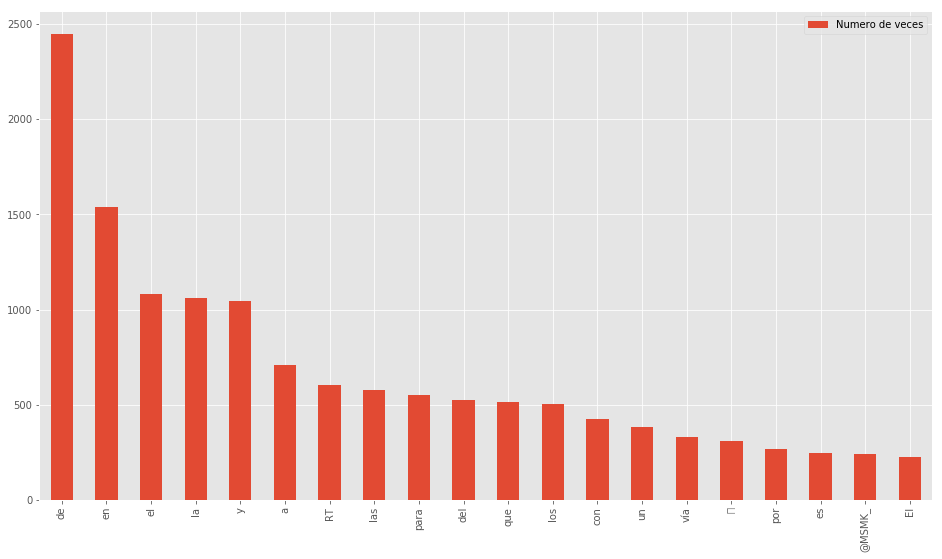

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas

# matplotlib viene con una biblioteca para que el estilo
# de los gráficos sea como el de ggplot de R:
plt.style.use("ggplot")

lista_de_keys = []
lista_de_values = []

for cadatupla in resultados:
    lista_de_keys.append(cadatupla[0])
    lista_de_values.append(cadatupla[1])
    
tablita = pandas.DataFrame({"Numero de veces": lista_de_values},
                          index = lista_de_keys)

tablita.plot(kind="bar", figsize=(16,9))

## Machine Learning

In [15]:
textoDeTweets.collect()[:10]

[Row(text=u'RT @RaquelBonsfills: Para que el mensaje llegue mejor a los dem\xe1s hemos de cuidar la parte visual:imagen, apoyo audiovisual,movimientos;la\u2026', retweet_count=2),
 Row(text=u'\xbfTe perdiste #FASHIONFUTURE18? \xa1No te preocupes! Puedes verlo aqu\xed \U0001f601\U0001f449https://t.co/QZoEPJ1I8u', retweet_count=1),
 Row(text=u'\xbfCu\xe1nto te gusta el mundo de la #moda? \xa1Inf\xf3rmate sobre nuestros m\xe1sters y programas especializados! NUEVAS CONVOCA\u2026 https://t.co/befimzBe92', retweet_count=0),
 Row(text=u'\xbfCu\xe1ntas #ecotendencias puedes nombrar dentro del sector #lujo? Con esta #infograf\xeda las descubrir\xe1s. Desc\xe1rgala gr\u2026 https://t.co/uIJXe7wVDy', retweet_count=0),
 Row(text=u'Led by @Zara, the 2017 Best Spanish Brands reach new dimensions of global growth  \u27a1https://t.co/DcPY4uqpcl v\xeda @Interbrand', retweet_count=0),
 Row(text=u'RT @Fashionbiz20: Ya puedes ver en nuestro Facebook #fashionbiz20 las fotograf\xedas con los mejores moment

In [17]:
textoDeTweets_con_ceros = textoDeTweets.rdd.map(lambda x: (x.text, 0) if 
                                            x.retweet_count==None else 
                                            (x.text, x.retweet_count))

In [18]:
textoDeTweets_con_ceros.collect()[:10]

[(u'RT @RaquelBonsfills: Para que el mensaje llegue mejor a los dem\xe1s hemos de cuidar la parte visual:imagen, apoyo audiovisual,movimientos;la\u2026',
  2),
 (u'\xbfTe perdiste #FASHIONFUTURE18? \xa1No te preocupes! Puedes verlo aqu\xed \U0001f601\U0001f449https://t.co/QZoEPJ1I8u',
  1),
 (u'\xbfCu\xe1nto te gusta el mundo de la #moda? \xa1Inf\xf3rmate sobre nuestros m\xe1sters y programas especializados! NUEVAS CONVOCA\u2026 https://t.co/befimzBe92',
  0),
 (u'\xbfCu\xe1ntas #ecotendencias puedes nombrar dentro del sector #lujo? Con esta #infograf\xeda las descubrir\xe1s. Desc\xe1rgala gr\u2026 https://t.co/uIJXe7wVDy',
  0),
 (u'Led by @Zara, the 2017 Best Spanish Brands reach new dimensions of global growth  \u27a1https://t.co/DcPY4uqpcl v\xeda @Interbrand',
  0),
 (u'RT @Fashionbiz20: Ya puedes ver en nuestro Facebook #fashionbiz20 las fotograf\xedas con los mejores momentos del #fashionfuture18 \nS\xedguenos y\u2026',
  2),
 (u'\xa1F\xf3rmate en #BrandManagement, #Dise\xf1o e #

In [19]:
print(textoDeTweets_con_ceros.collect()[2][0])

¿Cuánto te gusta el mundo de la #moda? ¡Infórmate sobre nuestros másters y programas especializados! NUEVAS CONVOCA… https://t.co/befimzBe92


In [20]:
RDD_limpio = textoDeTweets_con_ceros.map(lambda x: (x[0], float(x[1])))

from pyspark.sql import SQLContext, Row
from pyspark.sql.types import StructType, StructField, StringType, DoubleType

sqlContext = SQLContext(sc)


esquema = StructType([
        StructField("texto", StringType(), True),
        StructField("retweets", DoubleType(), True)])

dataset_limpio = sqlContext.createDataFrame(RDD_limpio, schema=esquema)

In [21]:
dataset_limpio.show()

+--------------------+--------+
|               texto|retweets|
+--------------------+--------+
|RT @RaquelBonsfil...|     2.0|
|¿Te perdiste #FAS...|     1.0|
|¿Cuánto te gusta ...|     0.0|
|¿Cuántas #ecotend...|     0.0|
|Led by @Zara, the...|     0.0|
|RT @Fashionbiz20:...|     2.0|
|¡Fórmate en #Bran...|     0.0|
|#Retos y #Desafío...|     0.0|
|@Mango se afianza...|     0.0|
|¿Sabías que la po...|     0.0|
|RT @Masterexperie...|     3.0|
|¿Son mejores las ...|     0.0|
|¡Fórmate en #Bran...|     0.0|
|#Creatividad: est...|     0.0|
|¡Fórmate en #BigD...|     0.0|
|#Retos y #Desafío...|     1.0|
|¿Te interesaría e...|     0.0|
|La tienda física ...|     2.0|
|La #disrupción es...|     1.0|
|Las #tendencias p...|     0.0|
+--------------------+--------+
only showing top 20 rows



In [22]:
from pyspark.ml.feature import HashingTF, Tokenizer

tokenizer = Tokenizer().setInputCol("texto").setOutputCol("palabras")
tf = HashingTF().setInputCol("palabras").setOutputCol("features")

In [23]:
from pyspark.ml.regression import LinearRegression

regresion = LinearRegression(featuresCol="features",labelCol="retweets")

In [24]:
from pyspark.ml import Pipeline

pipeline = Pipeline().setStages([tokenizer, tf, regresion])

In [25]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

pool_de_modelos = ParamGridBuilder() \
    .addGrid(tf.numFeatures, range(10000,90000,10000)) \
    .addGrid(regresion.maxIter, range(30, 300, 50)) \
    .build()

evaluador_regresion = RegressionEvaluator(predictionCol="prediction", labelCol="retweets", metricName="mse")

validador = CrossValidator() \
    .setEstimator(pipeline) \
    .setEstimatorParamMaps(pool_de_modelos) \
    .setEvaluator(evaluador_regresion)

In [26]:
mejor_modelo = validador.fit(dataset_limpio)

## Persistencia del modelo

In [55]:
model = mejor_modelo.bestModel

In [56]:
model.write().overwrite().save("file:///home/cloudera/Hadoop/spark/notebooks/ml/models/twitter_model")

## Proceso Batch

In [8]:
from pyspark.ml.pipeline import PipelineModel 
import pandas as pd
import numpy as np

In [9]:
model = PipelineModel.load("file:///home/cloudera/Hadoop/spark/notebooks/ml/models/twitter_model")

In [10]:
sqlContext = SQLContext(sc)

rdd = sc.parallelize([("Nuevo algoritmo de #machinelearning #BigData",),
                                    ("Anuncio del modelo MF4331TV de Samsung #DigitalMarketing #SocialMedia #Marketing",),
                                    ("Estamos teniendo problemas con la pagina web. Os mantendremos informados",),
                                    ])
# Los preparamos para meterlos en el modelo:
tweets_hipoteticos = sqlContext.createDataFrame(rdd, schema=["texto"])

In [11]:
predicciones = model.transform(tweets_hipoteticos)[["texto","prediction"]].collect()
predicciones

[Row(texto=u'Nuevo algoritmo de #machinelearning #BigData', prediction=3.090287913773323),
 Row(texto=u'Anuncio del modelo MF4331TV de Samsung #DigitalMarketing #SocialMedia #Marketing', prediction=2.942713166850101),
 Row(texto=u'Estamos teniendo problemas con la pagina web. Os mantendremos informados', prediction=0.17579051567016868)]

In [13]:
# Construimos una tabla con los resultados:
predicciones_en_tabla = pd.DataFrame(np.asarray(predicciones))
predicciones_en_tabla.columns = ["Tweet", "Prediccion de retweets"]
predicciones_en_tabla["Prediccion de retweets"]=np.trunc(
                                                    predicciones_en_tabla["Prediccion de retweets"]\
                                                    .astype("float"))
predicciones_en_tabla

,Tweet,Prediccion de retweets
0,Nuevo algoritmo de #machinelearning #BigData,3.0
1,Anuncio del modelo MF4331TV de Samsung #Digita...,2.0
2,Estamos teniendo problemas con la pagina web. ...,0.0
